### MAE_6967_Respiratorio e Digestivo_20set2020_Denise_A23set

1) Análise inicial do arquivo SIH

2) Correlação com doenças digestivo -- separação de dados específicos

3) Juntar depois com arquivos do entorno e afins para montar correlação.

# Bibliotecas

In [1]:
import plotly_express as px
# biblioteca nova, para visualização com diferentes formas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
import scipy
import seaborn as sns
import statsmodels
import statsmodels.stats.api as sms

In [2]:
# parâmetros dos gráficos para o arquivo
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

%matplotlib inline
plt.rcParams.update(params)

# Leitura do Arquivo dados_SIH_AIH_SP_2017

In [3]:
df=pd.read_csv('b_17.csv',encoding = "ISO-8859-1", low_memory=False, nrows=10000)
# somente 10 mil linhas, para não carregar muito

In [4]:
df.head()

gid   uf_zi  ano_cmpt  mes_cmpt  espec  cgc_hosp          n_aih  ident  \
0    1  350000      2017         1      3       NaN  3517107468424      1   
1    2  350000      2017         1      3       NaN  3517107468457      1   
2    3  350000      2017         1      3       NaN  3517107468512      1   
3    4  350000      2017         1      3       NaN  3517107468600      1   
4    5  350000      2017         1      3       NaN  3517107468622      1   

       cep  munic_res  ...  tpdisec3  tpdisec4  tpdisec5  tpdisec6  tpdisec7  \
0  8665480     355250  ...         0         0         0         0         0   
1  3577030     355030  ...         0         0         0         0         0   
2  1446010     355030  ...         0         0         0         0         0   
3  5159180     355030  ...         0         0         0         0         0   
4  8830290     353060  ...         0         0         0         0         0   

   tpdisec8  tpdisec9  uf   ano  mes  
0         0         0  SP  2017    1  
1         0         0  SP  2017    1  
2         0         0  SP  2017    1  
3         0         0  SP  2017    1  
4         0         0  SP  2017    1  

[5 rows x 117 columns]

In [5]:
df.info()
# nr total de linhas correto, com um index e gid (na esquerda), que não devem ser usados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 117 entries, gid to mes
dtypes: float64(16), int64(89), object(12)
memory usage: 8.9+ MB


In [6]:
df.isnull().sum() 
# não temos nulos, ok.

gid         0
uf_zi       0
ano_cmpt    0
mes_cmpt    0
espec       0
           ..
tpdisec8    0
tpdisec9    0
uf          0
ano         0
mes         0
Length: 117, dtype: int64

# Preparação de dados específicos

In [12]:
df1=pd.DataFrame(df,columns=['munic_res', 'diag_princ'])
print(df1.shape)
df1.sample(3)

(10000, 2)


munic_res diag_princ
8129     355030       D259
2171     351060        N47
4688     355030       I219

In [13]:
# Doenças do aparelho respiratório J00-J99,
# Doenças do aparelho digestivo    K00-K93
# Separação das doenças do sistema digestivo especificamente -- grupo CID10 = K20 -K93

In [14]:
dados = df1.loc[:, ['munic_res','diag_princ']]
# subconjunto_chave primária_doença
dados['subgrupo'] = dados['diag_princ'].astype(str).str.slice(0,1)
#focar na letra_inicial, criando uma coluna específica subgrupo, só com a letra K ou J
temp = np.where(dados['subgrupo'].isin(['K', 'J']))
#específico para K e J
dados = dados.loc[temp]
# reunir tudo
dados.sample(3)

munic_res diag_princ subgrupo
6053     351690       J159        J
8870     351620       K403        K
7985     355030       K350        K

In [15]:
dados.shape
# conjunto pequeno, cerca de 10% do arquivo inicial

(1776, 3)

In [16]:
dados.info()
# munic_res como "int64"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 19 to 9993
Data columns (total 3 columns):
munic_res     1776 non-null int64
diag_princ    1776 non-null object
subgrupo      1776 non-null object
dtypes: int64(1), object(2)
memory usage: 55.5+ KB


In [17]:
# transformando K em numérico
dadosK = df1.loc[:, ['munic_res','diag_princ']]
dadosK['subgrupo'] = dadosK['diag_princ'].astype(str).str.slice(0,1)
#dadosK['Cod_setor'] = dadosK['Cod_setor'].astype(str)
temp = np.where(dadosK['subgrupo'].isin(['K']))
dadosK = dadosK.loc[temp]
dadosK.sample(3)

munic_res diag_princ subgrupo
9891     351380       K429        K
6302     350280       K409        K
8122     355030        K30        K

In [18]:
dadosk = dadosK.dropna()

In [19]:
# isolar apenas os J
dadosJ = df1.loc[:, ['munic_res','diag_princ']]
dadosJ['subgrupo'] = dadosJ['diag_princ'].astype(str).str.slice(0,1)
temp = np.where(dadosJ['subgrupo'].isin(['J']))
dadosJ = dadosJ.loc[temp]
dadosJ.sample(3)

munic_res diag_princ subgrupo
5050     353440       J209        J
3350     354070        J91        J
1220     314800       J189        J

In [20]:
dadosJ = dadosJ.dropna()

In [21]:
dadosK.shape

(1120, 3)

In [22]:
dadosJ.shape

(656, 3)

In [23]:
1120 + 656
# partição correta com relação às doenças J & K

1776

# Junção dos dataframes das doenças K e J -- uso de função "concat"

In [24]:
d=[dadosJ,dadosK]
d1=pd.concat(d)
d1.info

<bound method DataFrame.info of       munic_res diag_princ subgrupo
21       351060       J189        J
32       352500       J158        J
35       352210       J849        J
36       355030       J158        J
47       355030        J81        J
...         ...        ...      ...
9960     351630       K802        K
9964     351380       K350        K
9983     351380       K831        K
9985     354330       K590        K
9992     354780       K573        K

[1776 rows x 3 columns]>

In [25]:
d1 = d1.dropna()

In [26]:
d1['munic_res'] = d1['munic_res'].astype(str)

In [27]:
d1.info(verbose=True)
# munic_res é now = "object"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 21 to 9992
Data columns (total 3 columns):
munic_res     1776 non-null object
diag_princ    1776 non-null object
subgrupo      1776 non-null object
dtypes: object(3)
memory usage: 55.5+ KB


In [28]:
d1.sample(10)

munic_res diag_princ subgrupo
7267    355030       K439        K
8290    355635       K808        K
7584    355030       K808        K
8317    353240       K402        K
3625    351030        J90        J
9503    351620       K439        K
8901    351620       K818        K
5942    353100       K858        K
3888    350280       J330        J
1476    352900       K562        K

### Acoplamento com arquivo entorno SP02 (cidades diferentes da Capital)
### entorno_02 = 47733 , 203 registros,
### chave primária deverá ser "Cod_setor", derivada do "munic_res"

In [29]:
pd.set_option('display.max_columns', None)  

In [30]:
a=pd.read_csv(r'e01_SP2.csv', sep=";",decimal='.',encoding = 'latin', low_memory=False, error_bad_lines=False, index_col=False, nrows=8000)

In [31]:
a['Cod_setor'] = a['Cod_setor'].astype(str).str.slice(0,6)
a.rename(columns={'Cod_setor':'munic_res'}, inplace=True)
print(a.shape)
a.sample(3)

(8000, 203)


munic_res  Situacao_setor  V001  V002  V003  V004  V005  V006  V007  \
2877    350450               1   220    96    30    61    26     7     0   
6427    350921               1   129     0     0     0     0     0     0   
4143    350600               1   227   182     4    31     1     9     0   

      V008  V009  V010  V011  V012  V013  V014  V015  V016  V017  V018  V019  \
2877   124     2    86     1     7     0   126     0    87     0     7     0   
6427     0     0     0     0     0     0     0     0     0     0     0     0   
4143   182     4    32     0     9     0    86   100    17    15     6     3   

      V020  V021  V022  V023  V024  V025  V026  V027  V028  V029  V030  V031  \
2877   126     0    87     0     7     0   126     0    87     0     7     0   
6427     0     0     0     0     0     0     0     0     0     0     0     0   
4143    71   115    15    17     6     3    98    88    21    11     6     3   

      V032  V033  V034  V035  V036  V037  V038  V039  V040  V041  V042  V043  \
2877    23   103    20    67     2     5     8   118     2    85     0     7   
6427     0     0     0     0     0     0     0     0     0     0     0     0   
4143    66   120    15    17     5     4     1   185     1    31     0     9   

      V044  V045  V046  V047  V048  V049  V050  V051  V052  V053  V054  V055  \
2877    54    72    29    58     2     5     3   123     0    87     1     6   
6427     0     0     0     0     0     0     0     0     0     0     0     0   
4143   178     8    30     2     9     0     4   182     1    31     0     9   

      V056  V057  V058  V059  V060  V061  V062  V063  V064  V065  V066  V067  \
2877     0   126     0    87     0     7   164    56     0     0   217     3   
6427     0     0     0     0     0     0     0     0     0     0     0     0   
4143    93    93    14    18     4     5   220     5     0     0   221     4   

      V068  V069  V070  V071  V072  V073  V074  V075  V076  V077  V078  V079  \
2877     0     0   220     0     0     0   220     0     0     0   220     0   
6427     0     0     0     0     0     0     0     0     0     0     0     0   
4143     0     0   109   116     0     0    92   133     0     0   125   100   

      V080  V081  V082  V083  V084  V085  V086  V087  V088  V089  V090  V091  \
2877     0     0    45   175     0     0    10   210     0     0    85   135   
6427     0     0     0     0     0     0     0     0     0     0     0     0   
4143     0     0    86   139     0     0     2   223     0     0   215    10   

      V092  V093  V094  V095  V096  V097  V098  V099  V100  V101  V102  V103  \
2877     0     0     4   216     0     0     0   220     0     0   162    56   
6427     0     0     0     0     0     0     0     0     0     0     0     0   
4143     0     0     5   220     0     0   110   115     0     0   219     5   

      V104  V105  V106  V107  V108  V109  V110  V111  V112  V113  V114  V115  \
2877     2     0     0     0   215     3     2     0     0     0   218     0   
6427     0     0     0     0     0     0     0     0     0     0     0     0   
4143     0     0     3     0   220     4     0     0     3     0   108   116   

      V116  V117  V118  V119  V120  V121  V122  V123  V124  V125  V126  V127  \
2877     2     0     0     0   218     0     2     0     0     0   218     0   
6427     0     0     0     0     0     0     0     0     0     0     0     0   
4143     0     0     1     2    92   132     0     0     0     3   124   100   

      V128  V129  V130  V131  V132  V133  V134  V135  V136  V137  V138  V139  \
2877     2     0     0     0    45   173     0     2     0     0    10   208   
6427     0     0     0     0     0     0     0     0     0     0     0     0   
4143     0     0     1     2    86   138     0     0     0     3     2   222   

      V140  V141  V142  V143  V144  V145  V146  V147  V148  V149  V150  V151  \
2877     0     2     0     0    84   134     1     1     0     0     4   214   
6427     

In [32]:
a.info(verbose=True)
# munic_res = "object"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 203 columns):
munic_res         object
Situacao_setor    int64
V001              int64
V002              int64
V003              int64
V004              int64
V005              int64
V006              int64
V007              int64
V008              int64
V009              int64
V010              int64
V011              int64
V012              int64
V013              int64
V014              int64
V015              int64
V016              int64
V017              int64
V018              int64
V019              int64
V020              int64
V021              int64
V022              int64
V023              int64
V024              int64
V025              int64
V026              int64
V027              int64
V028              int64
V029              int64
V030              int64
V031              int64
V032              int64
V033              int64
V034              int64
V035              int64
V03

In [33]:
a1 = a.loc[:, ['munic_res','Situacao_setor','V001']]

In [34]:
a1.head(3)

munic_res  Situacao_setor  V001
0    350011               1   149
1    350011               1   294
2    350011               1   214

In [35]:
mg = pd.merge(a1,d1,on='munic_res', how='inner')
# junção dos arquivos, naquilo que for comum aos dois, pelo "munic_res"

In [36]:
mg.info(verbose=True)
# nr de linhas muito maior do que esperado, pode haver duplicação desnecessária

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45444 entries, 0 to 45443
Data columns (total 5 columns):
munic_res         45444 non-null object
Situacao_setor    45444 non-null int64
V001              45444 non-null int64
diag_princ        45444 non-null object
subgrupo          45444 non-null object
dtypes: int64(2), object(3)
memory usage: 2.1+ MB


In [37]:
mg.drop_duplicates(inplace=True)
# retirada de duplicações eventuais

In [38]:
mg.info()
# sim, houve duplicações: 45444 - 16346 = 29098 (nr alto!!)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16346 entries, 0 to 45317
Data columns (total 5 columns):
munic_res         16346 non-null object
Situacao_setor    16346 non-null int64
V001              16346 non-null int64
diag_princ        16346 non-null object
subgrupo          16346 non-null object
dtypes: int64(2), object(3)
memory usage: 766.2+ KB


In [39]:
mg.dropna()
# retirada de NaNs eventuais

munic_res  Situacao_setor  V001 diag_princ subgrupo
0        350020               1   246       J342        J
1        350020               1   246       K800        K
2        350020               1   234       J342        J
3        350020               1   234       K800        K
4        350020               1   293       J342        J
...         ...             ...   ...        ...      ...
45307    350950               1    64       K409        K
45308    350950               1    64       K429        K
45315    350950               1    50       K439        K
45316    350950               1    50       K409        K
45317    350950               1    50       K429        K

[16346 rows x 5 columns]

In [40]:
mg.drop_duplicates(inplace=True)
# nova verficação sobre duplicações não esperadas

In [41]:
mg.info()
# restaram os mesmos 16346, parece que é o resultado final...

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16346 entries, 0 to 45317
Data columns (total 5 columns):
munic_res         16346 non-null object
Situacao_setor    16346 non-null int64
V001              16346 non-null int64
diag_princ        16346 non-null object
subgrupo          16346 non-null object
dtypes: int64(2), object(3)
memory usage: 766.2+ KB


In [42]:
mg.isnull().sum().sum()

0

In [43]:
mg.isna().values.sum()

0

### Fim da preparação de arquivo para Correlação.
### Regressão Logística para saber se a doença é do tipo J ou K

Text(0, 0.5, 'Frequencia')

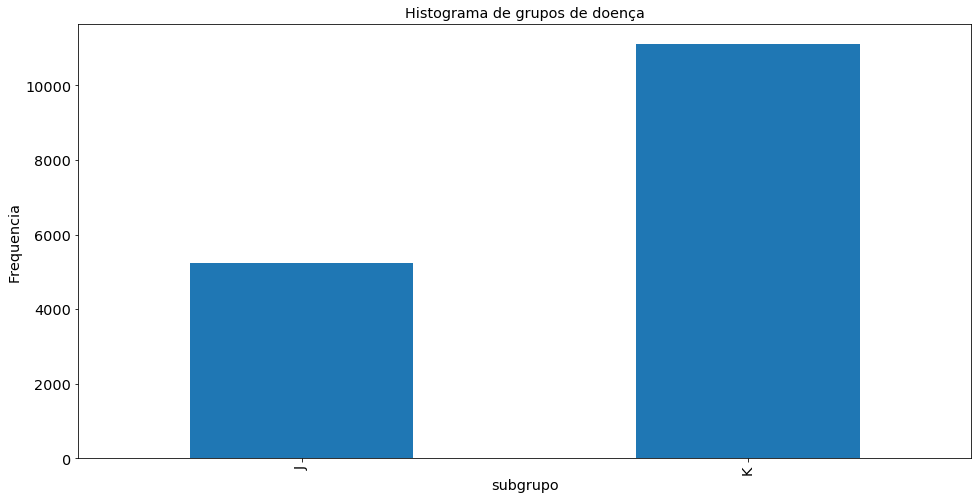

In [45]:
count_classes = pd.value_counts(mg['subgrupo'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Histograma de grupos de doença")
plt.xlabel("subgrupo")
plt.ylabel("Frequencia")

In [46]:
count_classes

J     5240
K    11106
Name: subgrupo, dtype: int64

In [47]:
5240+11106

16346

In [49]:
y = mg.loc[:,'subgrupo']

In [50]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()

In [51]:
y = le.fit_transform(y)

In [52]:
y = np.ravel(y)
y.shape

(16346,)

In [53]:
X = mg.drop(['subgrupo', "diag_princ"],axis=1)

In [54]:
X.dropna()

munic_res  Situacao_setor  V001
0        350020               1   246
1        350020               1   246
2        350020               1   234
3        350020               1   234
4        350020               1   293
...         ...             ...   ...
45307    350950               1    64
45308    350950               1    64
45315    350950               1    50
45316    350950               1    50
45317    350950               1    50

[16346 rows x 3 columns]

In [55]:
X.isna().values.sum()

0

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,random_state=123,stratify=y)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix

In [61]:
def CMatrix(CM,labels =['J','K']):
    df = pd.DataFrame( data = CM, index = labels, columns = labels)
    df.index.name ='Real'
    df.columns.name = 'Previsto'
    df.loc['Total']= df.sum()
    df['Total']= df.sum(axis=1)
    return df 

In [62]:
from sklearn.linear_model import LogisticRegression
logistic_regression= LogisticRegression(solver = 'sag', max_iter = 100000, class_weight={1:0.8,0:0.2})
log = logistic_regression.fit(X_train,y_train)

y_pred_test_log = logistic_regression.predict(X_test) 
acuracia_log = accuracy_score(y_pred=y_pred_test_log,y_true=y_test)
precisao_log = precision_score(y_pred=y_pred_test_log,y_true=y_test)
recall_log = recall_score(y_pred=y_pred_test_log,y_true=y_test)

CM= confusion_matrix(y_pred=y_pred_test_log,y_true=y_test)
CMatrix(CM).T

Real        J     K  Total
Previsto                  
J           0     0      0
K         524  1111   1635
Total     524  1111   1635